<a href="https://colab.research.google.com/github/adithi20/Arrays/blob/main/Cat_%26_dog_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [4]:
# Set Variables
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Create Image Generators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to create data generators
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(batch_size=1,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode=None,
                                                         shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [5]:
# Recreate train_image_generator with Random Transformations
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
history = model.fit(train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)


Epoch 1/15
15/15 [==============================] - 123s 8s/step - loss: 0.8220 - accuracy: 0.4861 - val_loss: 0.6900 - val_accuracy: 0.5033
Epoch 2/15
15/15 [==============================] - 127s 8s/step - loss: 0.6907 - accuracy: 0.5198 - val_loss: 0.6719 - val_accuracy: 0.5993
Epoch 3/15
15/15 [==============================] - 121s 8s/step - loss: 0.6748 - accuracy: 0.5454 - val_loss: 0.6614 - val_accuracy: 0.5804
Epoch 4/15
15/15 [==============================] - 121s 8s/step - loss: 0.6623 - accuracy: 0.5694 - val_loss: 0.6619 - val_accuracy: 0.6004
Epoch 5/15
15/15 [==============================] - 127s 9s/step - loss: 0.6538 - accuracy: 0.6042 - val_loss: 0.6249 - val_accuracy: 0.6239
Epoch 6/15
15/15 [==============================] - 127s 8s/step - loss: 0.6538 - accuracy: 0.5951 - val_loss: 0.6347 - val_accuracy: 0.6607
Epoch 7/15
15/15 [==============================] - 125s 8s/step - loss: 0.6446 - accuracy: 0.6250 - val_loss: 0.6395 - val_accuracy: 0.6228
Epoch 8/15
15

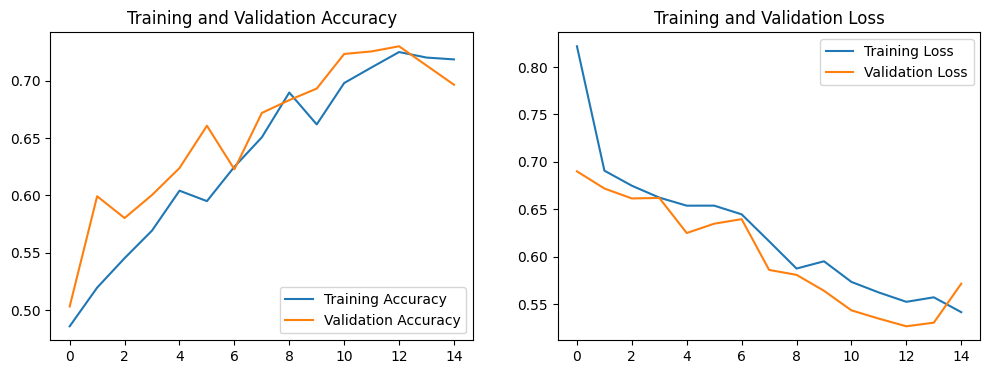

In [10]:
# Visualize the training progress
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [12]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=1,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode=None,
                                                         shuffle=False)


Found 0 images belonging to 0 classes.


In [13]:
test_dir = os.path.join(PATH, 'test')

test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(batch_size=1,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode=None,
                                                         shuffle=False)


Found 0 images belonging to 0 classes.


In [14]:
test_images = os.listdir(test_dir)
print(test_images)



['6.jpg', '27.jpg', '12.jpg', '24.jpg', '41.jpg', '29.jpg', '30.jpg', '28.jpg', '50.jpg', '7.jpg', '44.jpg', '47.jpg', '5.jpg', '40.jpg', '21.jpg', '3.jpg', '33.jpg', '37.jpg', '46.jpg', '2.jpg', '.DS_Store', '4.jpg', '45.jpg', '39.jpg', '17.jpg', '26.jpg', '42.jpg', '38.jpg', '25.jpg', '34.jpg', '19.jpg', '18.jpg', '35.jpg', '22.jpg', '48.jpg', '10.jpg', '23.jpg', '36.jpg', '14.jpg', '1.jpg', '9.jpg', '8.jpg', '20.jpg', '32.jpg', '16.jpg', '49.jpg', '15.jpg', '43.jpg', '13.jpg', '31.jpg', '11.jpg']


In [16]:
# Set Variables
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Create Image Generators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to create data generators for training and validation
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

# Manually load the test data using flow_from_dataframe
import pandas as pd

# Assuming the test images are in the 'test' directory and named '1.jpg', '2.jpg', etc.
test_filenames = [str(i) + '.jpg' for i in range(1, 51)]
test_df = pd.DataFrame({'filename': test_filenames})

test_data_gen = test_image_generator.flow_from_dataframe(test_df,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         x_col='filename',
                                                         class_mode=None,
                                                         shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 validated image filenames.


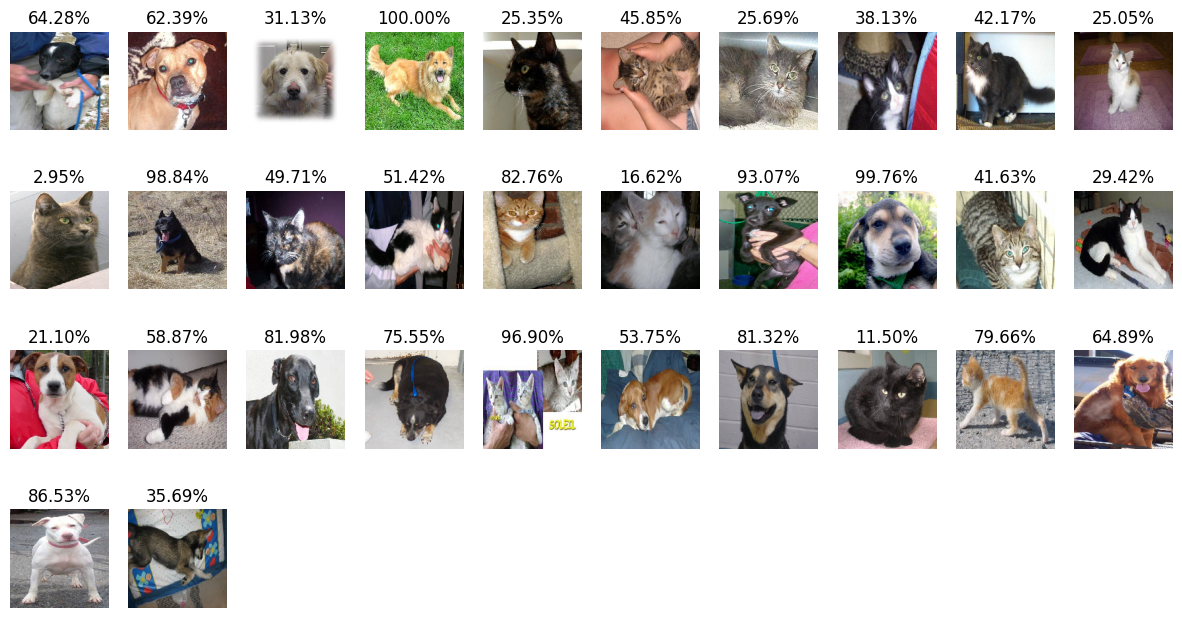

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_with_probabilities(images, probabilities):
    plt.figure(figsize=(15, 10))
    num_images = len(images)

    for i in range(num_images):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i])

        # If probabilities is a 2D array (multiple classes), use the class with the highest probability
        if len(probabilities.shape) == 2:
            class_index = np.argmax(probabilities[i])
            probability_value = probabilities[i][class_index]
        else:
            probability_value = probabilities[i]

        plt.title(f"{probability_value:.2%}")
        plt.axis("off")

    plt.show()

# Call the updated function
plot_images_with_probabilities(test_data_gen[0], probabilities)
